<a href="https://colab.research.google.com/github/CodingMyth/API-Documentation/blob/master/Copy_of_FinalVisualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this experimental project is to analyse the performances of different ML algorithms on sentiment analysis

## Sentiment Analysis using the ACL IMDB Dataset
This notebook uses the **ACL IMDB dataset** for binary sentiment classification.
The dataset was introduced by Maas et al. (2011) in their work on "Learning Word Vectors for Sentiment Analysis."

### Citation
https://ai.stanford.edu/~amaas/data/sentiment/

Necessary installations

In [ ]:
!pip install git+https://github.com/huggingface/transformers.git datasets
!pip install torch --upgrade
!pip install torchvision --upgrade
!pip install torchaudio --upgrade

Data Exploration

In [ ]:
import pandas as pd
train_data=pd.read_csv('/content/train_data.csv')
test_data=pd.read_csv('/content/test_data.csv')

In [ ]:
train_data.head()

,review,sentiment
0,This was one of those wonderful rare moments i...,1
1,Have you seen The Graduate? It was hailed as t...,1
2,"I don't watch a lot of TV, except for The Offi...",1
3,Kubrick again puts on display his stunning abi...,1
4,"First of all, I liked very much the central id...",1


In [ ]:
test_data.head()

,review,sentiment
0,"I've Seen The Beginning Of The Muppet Movie, B...",1
1,If it had been made 2 years later it would hav...,1
2,"Very good ""Precoder"" starring Dick Barthelmess...",1
3,A young man discovers that life is precious af...,1
4,"I'm always surprised, given that the famous ti...",1


Whethere the data has any null or not

In [ ]:
# Check if there are any null values in train_data
print("Null values in train_data:", train_data.isnull().any().any())

# Check if there are any null values in test_data
print("Null values in test_data:", test_data.isnull().any().any())


Null values in train_data: False
Null values in test_data: False


Checks the review distribution accross sentiments.

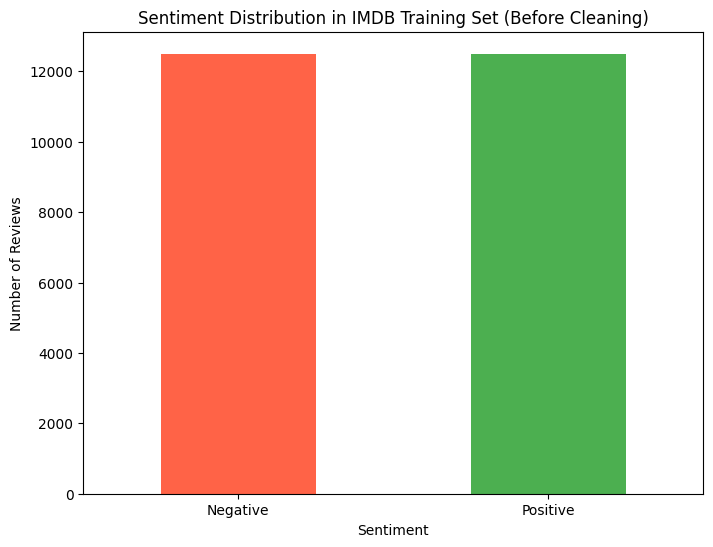

In [ ]:
import matplotlib.pyplot as plt

# Visualize the sentiment distribution in the training data
sentiment_counts = train_data['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['#ff6347', '#4caf50'])
plt.title('Sentiment Distribution in IMDB Training Set (Before Cleaning)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)
plt.show()


Checks most frequent words

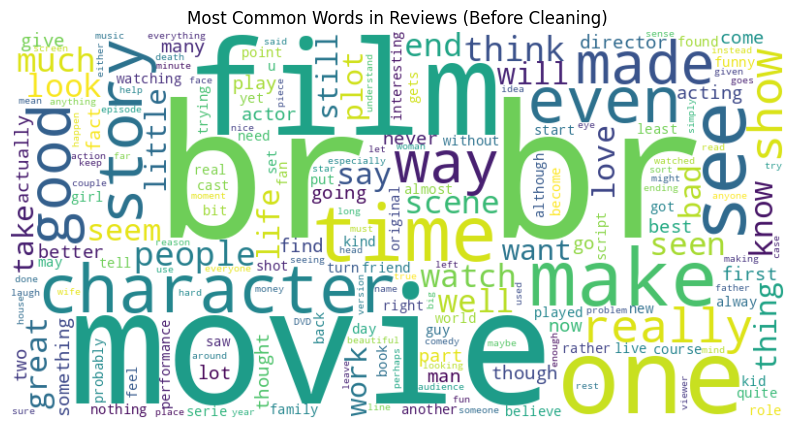

In [ ]:
# Import the WordCloud class
from wordcloud import WordCloud

# Join all reviews into one large string
all_reviews = ' '.join(train_data['review'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews (Before Cleaning)')
plt.show()


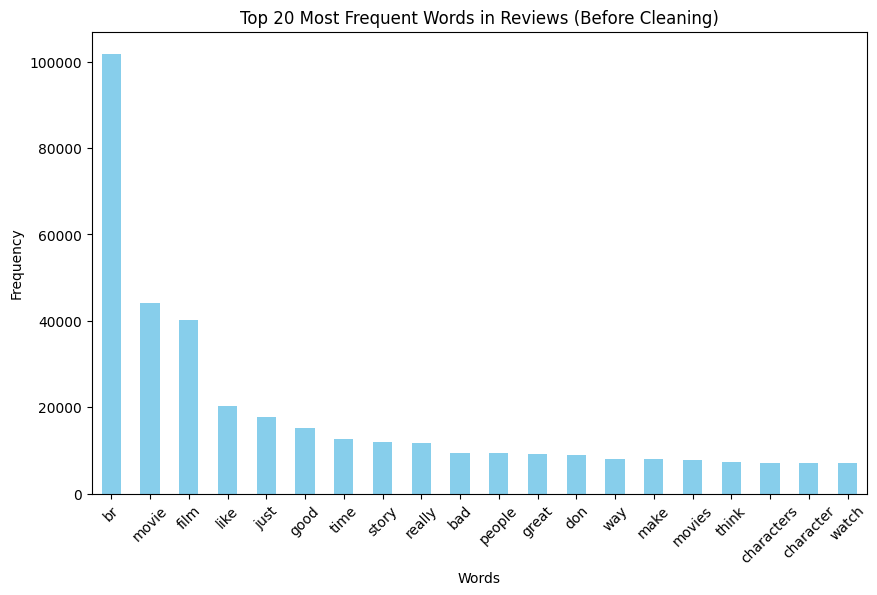

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Use CountVectorizer to get word frequencies
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(train_data['review'])
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Sum the word counts across all reviews and sort them
word_counts = word_freq.sum(axis=0).sort_values(ascending=False)

# Plot the top 20 most frequent words
plt.figure(figsize=(10, 6))
word_counts.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Frequent Words in Reviews (Before Cleaning)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


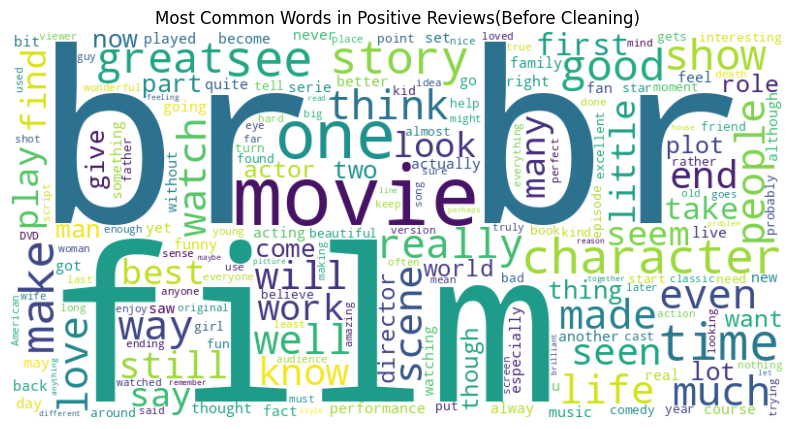

In [ ]:
from wordcloud import WordCloud

# Filter positive reviews
positive_reviews = train_data[train_data['sentiment'] == 1]['review']

# Join all positive reviews into one large string
positive_reviews_text = ' '.join(positive_reviews)

# Generate the word cloud for positive reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews_text)

# Plot the word cloud for positive reviews
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Positive Reviews(Before Cleaning)')
plt.show()


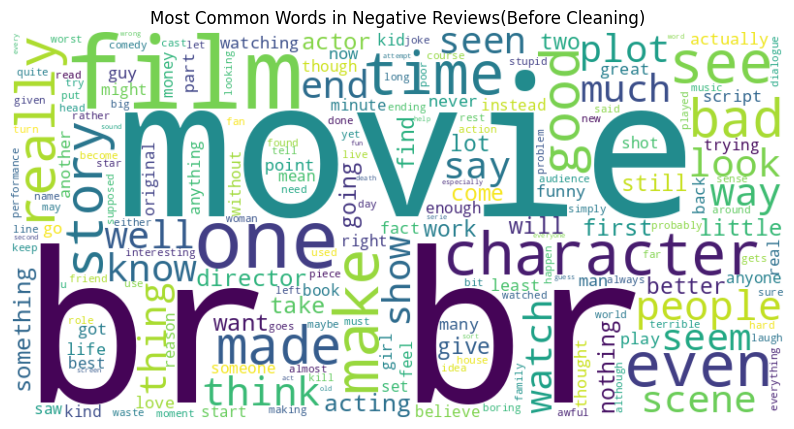

In [ ]:
# Filter negative reviews
negative_reviews = train_data[train_data['sentiment'] == 0]['review']

# Join all negative reviews into one large string
negative_reviews_text = ' '.join(negative_reviews)

# Generate the word cloud for negative reviews
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews_text)

# Plot the word cloud for negative reviews
plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Negative Reviews(Before Cleaning)')
plt.show()


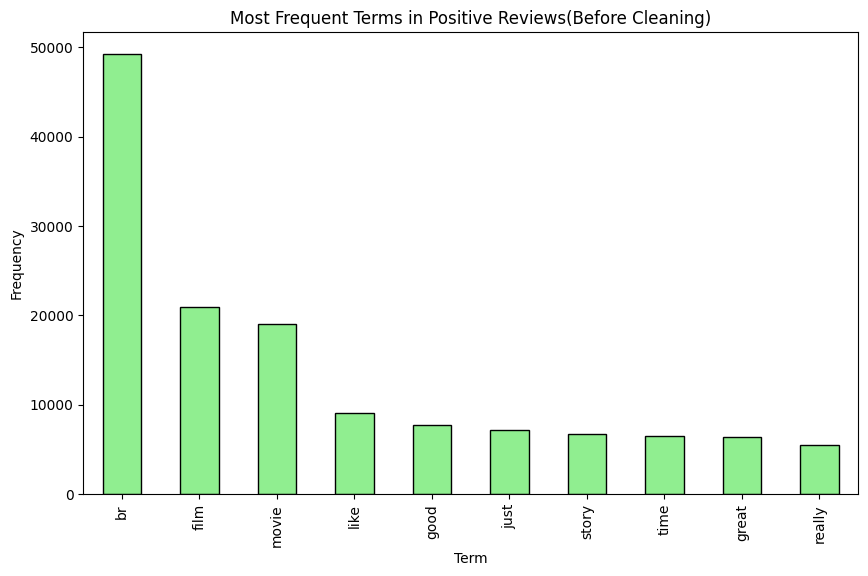

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Set up CountVectorizer for term frequency
vectorizer = CountVectorizer(stop_words='english', max_features=10)

# Fit the vectorizer on positive reviews and transform the text
positive_term_freq = vectorizer.fit_transform(positive_reviews)

# Convert the result to a DataFrame
positive_term_freq_df = pd.DataFrame(positive_term_freq.toarray(), columns=vectorizer.get_feature_names_out())

# Calculate frequency of terms
positive_term_freq_sum = positive_term_freq_df.sum(axis=0).sort_values(ascending=False)

# Plot the most frequent terms for positive reviews
plt.figure(figsize=(10, 6))
positive_term_freq_sum.head(10).plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Most Frequent Terms in Positive Reviews(Before Cleaning)')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.show()


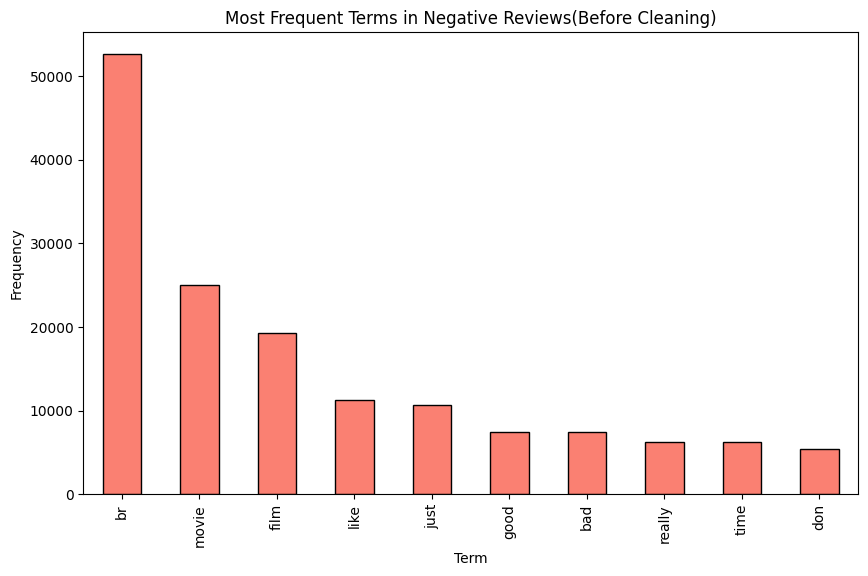

In [ ]:
# Fit the vectorizer on negative reviews and transform the text
negative_term_freq = vectorizer.fit_transform(negative_reviews)

# Convert the result to a DataFrame
negative_term_freq_df = pd.DataFrame(negative_term_freq.toarray(), columns=vectorizer.get_feature_names_out())

# Calculate frequency of terms
negative_term_freq_sum = negative_term_freq_df.sum(axis=0).sort_values(ascending=False)

# Plot the most frequent terms for negative reviews
plt.figure(figsize=(10, 6))
negative_term_freq_sum.head(10).plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Most Frequent Terms in Negative Reviews(Before Cleaning)')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.show()


Checks distribution of review length:

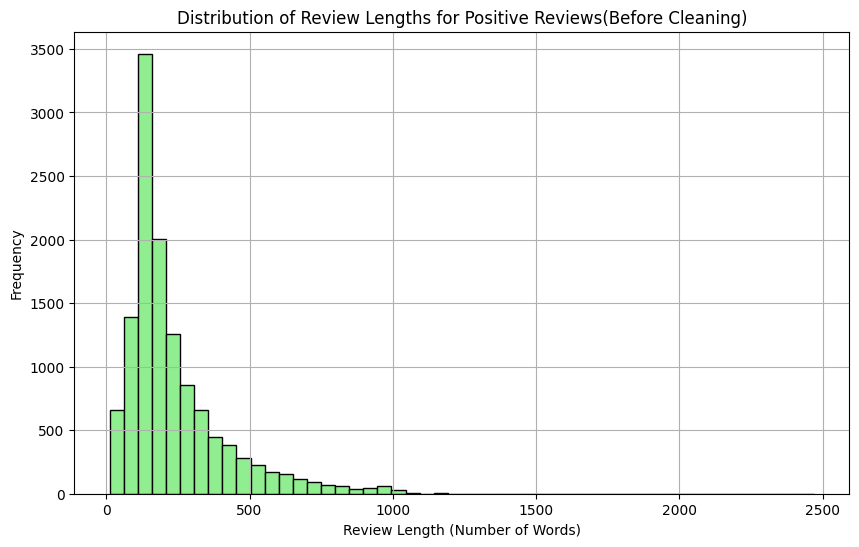

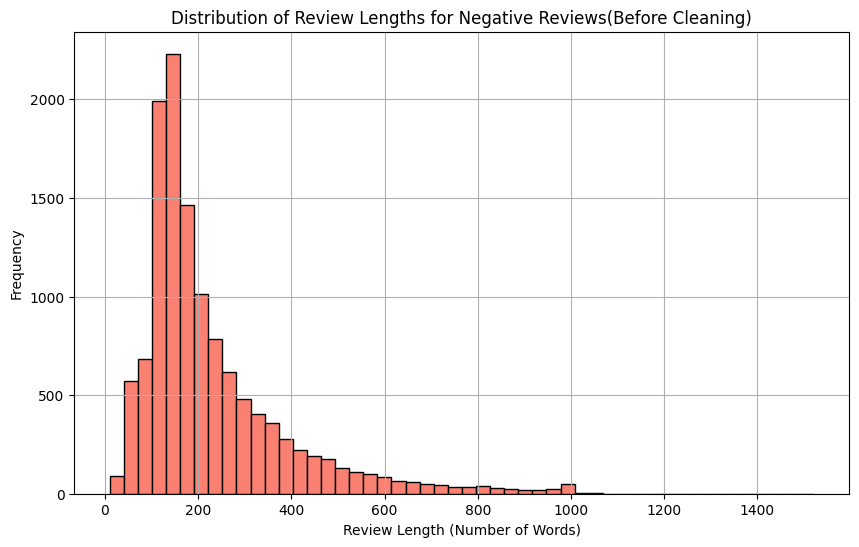

In [ ]:
import matplotlib.pyplot as plt
# Calculate the length of each review (in terms of number of words)
train_data['review_length'] = train_data['review'].apply(lambda x: len(x.split()))

# Plot the distribution of review lengths for positive reviews
plt.figure(figsize=(10, 6))
train_data[train_data['sentiment'] == 1]['review_length'].hist(bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Review Lengths for Positive Reviews(Before Cleaning)')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of review lengths for negative reviews
plt.figure(figsize=(10, 6))
train_data[train_data['sentiment'] == 0]['review_length'].hist(bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Review Lengths for Negative Reviews(Before Cleaning)')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()


Correlation between review lenght and sentiment.

<ipython-input-6-62ec674457c6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='review_length', data=train_data, palette={'0': 'red', '1': 'green'})


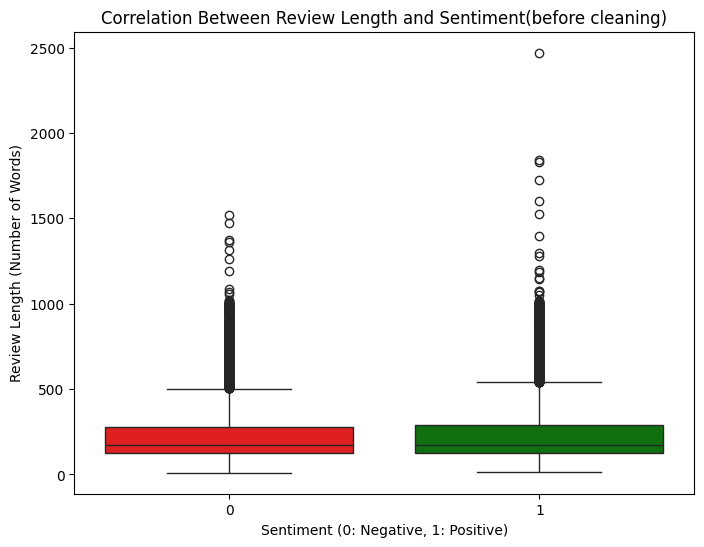

In [ ]:
import seaborn as sns
# Custom colors for sentiment: negative reviews in red, positive in green
plt.figure(figsize=(8, 6))
# Changed the keys in the palette dictionary to match the string values in the 'sentiment' column
sns.boxplot(x='sentiment', y='review_length', data=train_data, palette={'0': 'red', '1': 'green'})
plt.title('Correlation Between Review Length and Sentiment(before cleaning)')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Review Length (Number of Words)')
plt.show()

For traditional ML algorithm different text pre-processing was used.

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'<[^>]*>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = word_tokenize(text)  # Tokenize
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]  # Lemmatize & remove stop words
    return ' '.join(text)



test_data['cleaned_review']=test_data['review'].apply(clean_text)
train_data['cleaned_review']=train_data['review'].apply(clean_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


This cleaning method is for transformers.

In [ ]:
from bs4 import BeautifulSoup
import re

# Contraction dictionary
contractions = {
    "n't": " not",
    "'re": " are",
    "'s": " is",
    "'d": " would",
    "'ll": " will",
    "'t": " not",
    "'ve": " have",
    "'m": " am"
}
def remove_urls(text):
    # Regular expression to match URLs
    url_pattern = r'http[s]?://\S+|www\.\S+'
    return re.sub(url_pattern, '', text)


def expand_contractions(text):
    for contraction, full_form in contractions.items():
        text = re.sub(rf"{contraction}\b", full_form, text)
    return text

def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    # Expand contractions
    text = expand_contractions(text)
    text=remove_urls(text)
    # Remove special characters (except punctuation)
    text = re.sub(r"[^a-zA-Z0-9.,!?;:()'\"]+", " ", text)
    return text.strip()


test_data['cleaned_review']=test_data['review'].apply(clean_text)
train_data['cleaned_review']=train_data['review'].apply(clean_text)

<ipython-input-3-1c8f632be84b>:28: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
<ipython-input-3-1c8f632be84b>:28: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [ ]:
train_data[['review', 'cleaned_review']].head(), test_data[['review', 'cleaned_review']].head()

(                                              review  \
 0  This was one of those wonderful rare moments i...   
 1  Have you seen The Graduate? It was hailed as t...   
 2  I don't watch a lot of TV, except for The Offi...   
 3  Kubrick again puts on display his stunning abi...   
 4  First of all, I liked very much the central id...   
 
                                       cleaned_review  
 0  This was one of those wonderful rare moments i...  
 1  Have you seen The Graduate? It was hailed as t...  
 2  I do not watch a lot of TV, except for The Off...  
 3  Kubrick again puts on display his stunning abi...  
 4  First of all, I liked very much the central id...  ,
                                               review  \
 0  I've Seen The Beginning Of The Muppet Movie, B...   
 1  If it had been made 2 years later it would hav...   
 2  Very good "Precoder" starring Dick Barthelmess...   
 3  A young man discovers that life is precious af...   
 4  I'm always surprised, given th

Most common words accross sentiments, at first it was checked togethere then by individual sentiments,

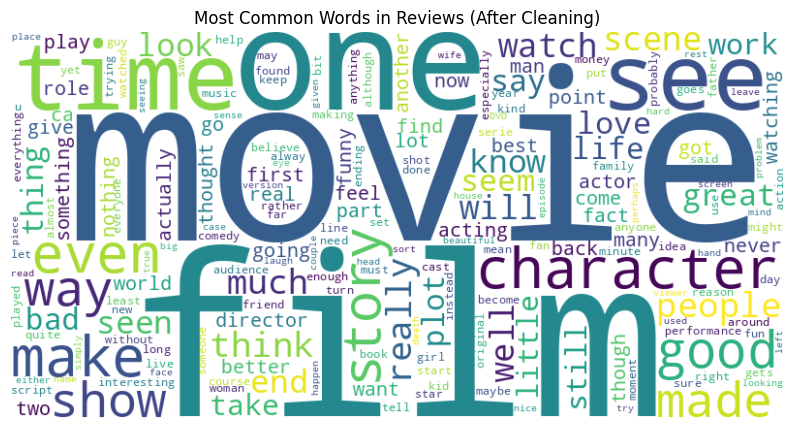

In [ ]:


# Join all reviews into one large string
all_reviews = ' '.join(train_data['cleaned_review'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews (After Cleaning)')
plt.show()

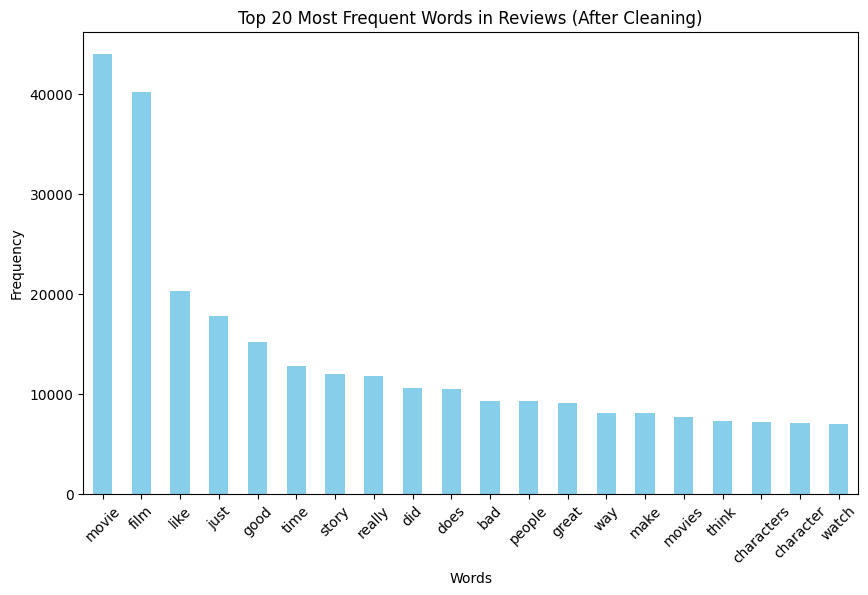

In [ ]:


# Use CountVectorizer to get word frequencies
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(train_data['cleaned_review'])
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Sum the word counts across all reviews and sort them
word_counts = word_freq.sum(axis=0).sort_values(ascending=False)

# Plot the top 20 most frequent words
plt.figure(figsize=(10, 6))
word_counts.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Frequent Words in Reviews (After Cleaning)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

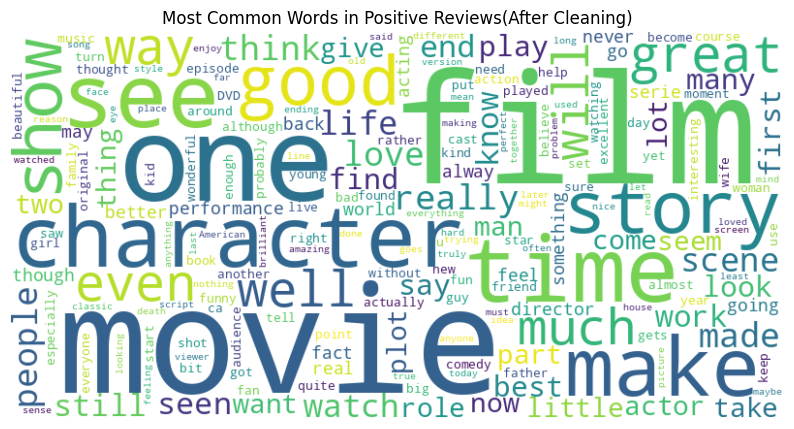

In [ ]:

# Filter positive reviews
positive_reviews = train_data[train_data['sentiment'] == 1]['cleaned_review']

# Join all positive reviews into one large string
positive_reviews_text = ' '.join(positive_reviews)

# Generate the word cloud for positive reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews_text)

# Plot the word cloud for positive reviews
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Positive Reviews(After Cleaning)')
plt.show()

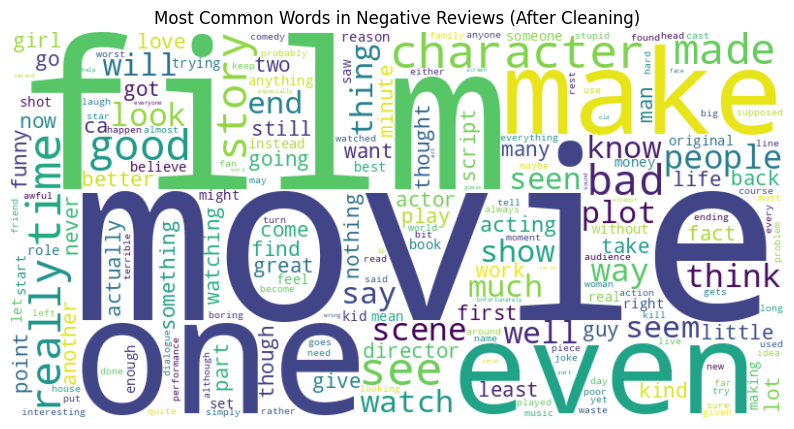

In [ ]:
# Filter negative reviews
negative_reviews = train_data[train_data['sentiment'] == 0]['cleaned_review']

# Join all negative reviews into one large string
negative_reviews_text = ' '.join(negative_reviews)

# Generate the word cloud for negative reviews
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews_text)

# Plot the word cloud for negative reviews
plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Negative Reviews (After Cleaning)')
plt.show()

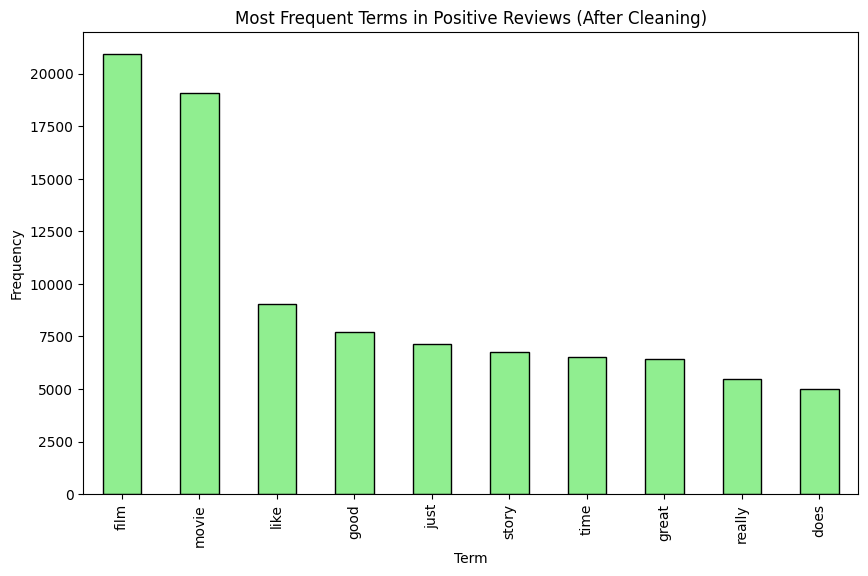

In [ ]:


# Set up CountVectorizer for term frequency
vectorizer = CountVectorizer(stop_words='english', max_features=10)

# Fit the vectorizer on positive reviews and transform the text
positive_term_freq = vectorizer.fit_transform(positive_reviews)

# Convert the result to a DataFrame
positive_term_freq_df = pd.DataFrame(positive_term_freq.toarray(), columns=vectorizer.get_feature_names_out())

# Calculate frequency of terms
positive_term_freq_sum = positive_term_freq_df.sum(axis=0).sort_values(ascending=False)

# Plot the most frequent terms for positive reviews
plt.figure(figsize=(10, 6))
positive_term_freq_sum.head(10).plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Most Frequent Terms in Positive Reviews (After Cleaning)')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.show()


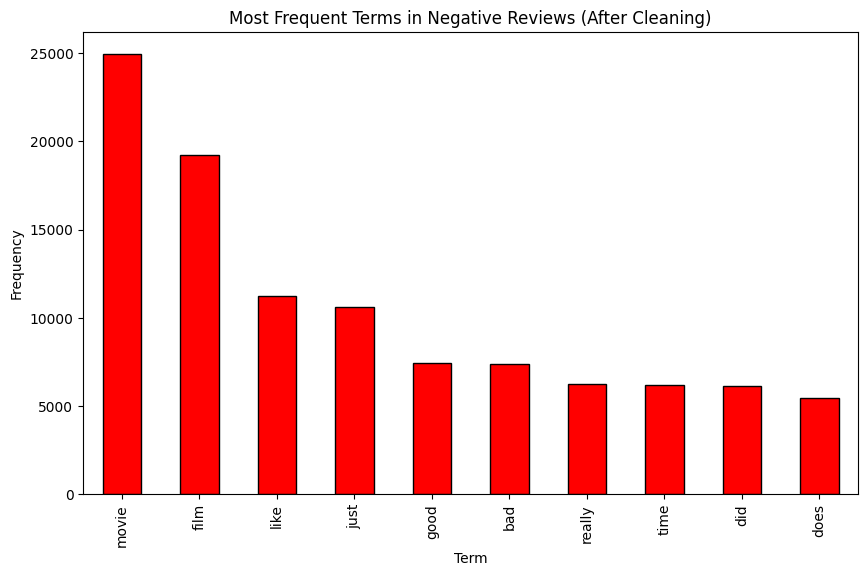

In [ ]:


# Set up CountVectorizer for term frequency
vectorizer = CountVectorizer(stop_words='english', max_features=10)

# Fit the vectorizer on positive reviews and transform the text
negative_term_freq = vectorizer.fit_transform(negative_reviews)

# Convert the result to a DataFrame
negative_term_freq_df = pd.DataFrame(negative_term_freq.toarray(), columns=vectorizer.get_feature_names_out())

# Calculate frequency of terms
negative_term_freq_sum = negative_term_freq_df.sum(axis=0).sort_values(ascending=False)

# Plot the most frequent terms for positive reviews
plt.figure(figsize=(10, 6))
negative_term_freq_sum.head(10).plot(kind='bar', color='red', edgecolor='black')
plt.title('Most Frequent Terms in Negative Reviews (After Cleaning)')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.show()


Review lengths accross sentiments,

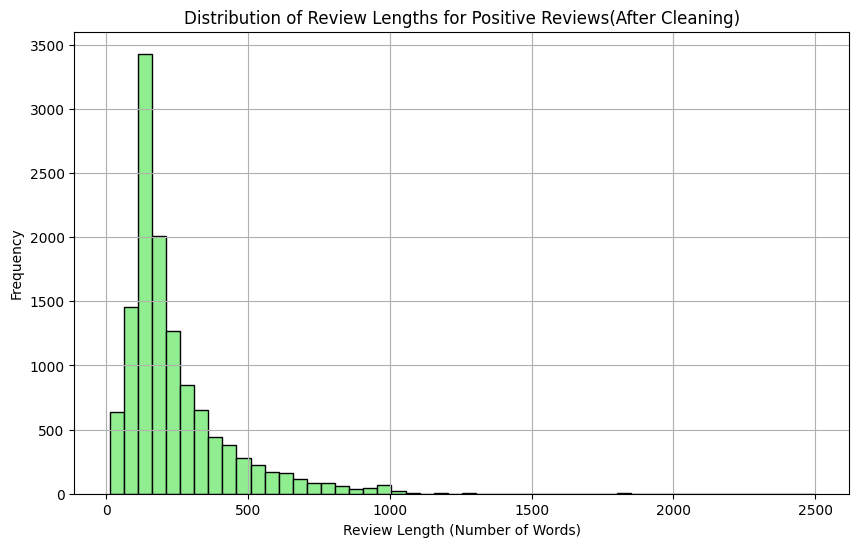

In [ ]:
# Calculate the length of each review (in terms of number of words)
train_data['cleaned_review_length'] = train_data['cleaned_review'].apply(lambda x: len(x.split()))

# Plot the distribution of review lengths for positive reviews
plt.figure(figsize=(10, 6))
train_data[train_data['sentiment'] == 1]['cleaned_review_length'].hist(bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Review Lengths for Positive Reviews(After Cleaning)')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()

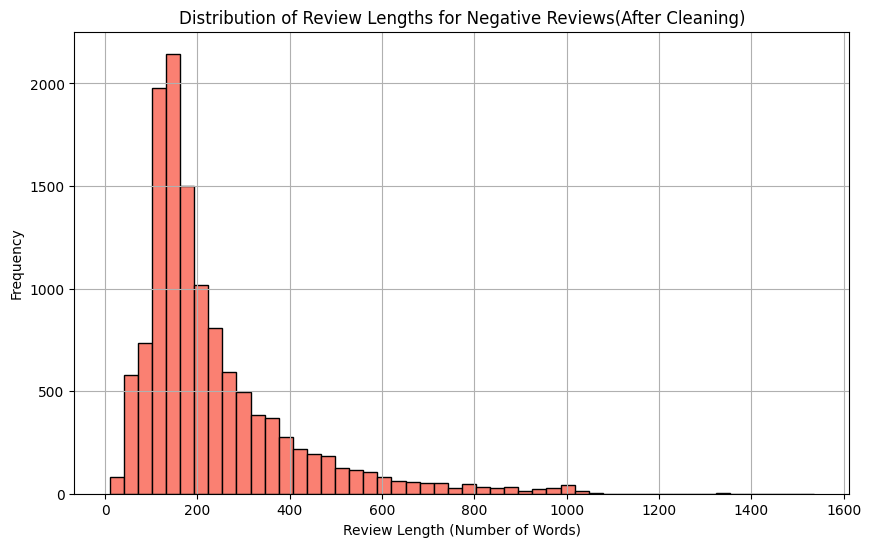

In [ ]:
# Calculate the length of each review (in terms of number of words)
train_data['cleaned_review_length'] = train_data['cleaned_review'].apply(lambda x: len(x.split()))

# Plot the distribution of review lengths for negative reviews
plt.figure(figsize=(10, 6))
train_data[train_data['sentiment'] == 0]['cleaned_review_length'].hist(bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Review Lengths for Negative Reviews(After Cleaning)')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-9-8425aa151695>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='cleaned_review_length', data=train_data, palette={'0': 'red', '1': 'green'})


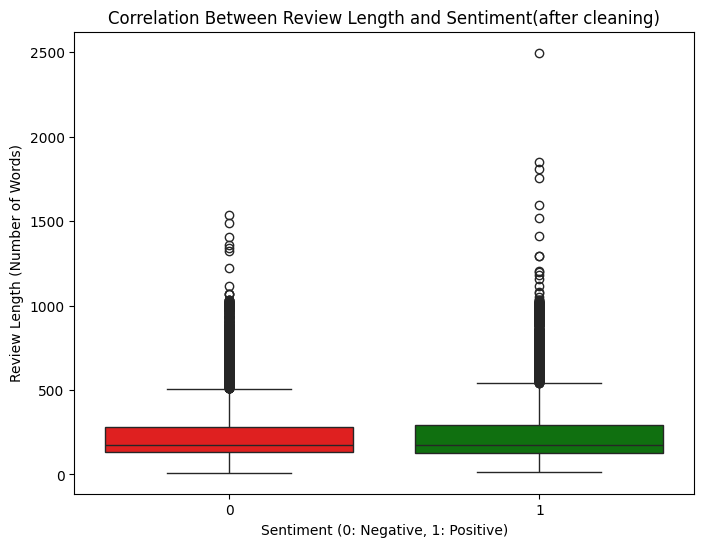

In [ ]:
# Custom colors for sentiment: negative reviews in red, positive in green
plt.figure(figsize=(8, 6))
# Changed the keys in the palette dictionary to match the string values in the 'sentiment' column
sns.boxplot(x='sentiment', y='cleaned_review_length', data=train_data, palette={'0': 'red', '1': 'green'})
plt.title('Correlation Between Review Length and Sentiment(after cleaning)')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Review Length (Number of Words)')
plt.show()

First traditional models which will be the base model pefromance,

From the 25k data I have used only 2500 here cause otherwise it takes too much time,

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Step 1: Extract cleaned reviews and sentiments
X_train = train_data['cleaned_review']
y_train = train_data['sentiment']
X_test = test_data['cleaned_review']
y_test = test_data['sentiment']

# Step 2: Vectorize the training and testing data
vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words='english'
)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 3: Create a balanced test subset
test_data_balanced = pd.DataFrame({
    'cleaned_review': X_test,
    'sentiment': y_test
})
samples_per_class = 2500  # For a total of 5000 samples (for 2 classes)
balanced_subset = test_data_balanced.groupby('sentiment', group_keys=False).apply(
    lambda x: x.sample(min(len(x), samples_per_class), random_state=42)
)
X_test_subset = balanced_subset['cleaned_review']
y_test_subset = balanced_subset['sentiment']

# Transform the balanced subset
X_test_subset_vectorized = vectorizer.transform(X_test_subset)

# Step 4: Train and evaluate models
models = {
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Naive Bayes": MultinomialNB(),
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_vectorized, y_train)
    y_pred = model.predict(X_test_subset_vectorized)
    accuracy = accuracy_score(y_test_subset, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")


<ipython-input-9-436b2285301a>:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_subset = test_data_balanced.groupby('sentiment', group_keys=False).apply(


Training SVM...
SVM Accuracy: 0.8794
Training Logistic Regression...
Logistic Regression Accuracy: 0.8794
Training Random Forest...
Random Forest Accuracy: 0.8488
Training Naive Bayes...
Naive Bayes Accuracy: 0.8522


for optimisation purpose using random search for both SVM and LR i have used smaller dataset sample of 250 for train and test as cross Validation with searching takes lots of time.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

# Training and test data
X_train = train_data['cleaned_review']
y_train = train_data['sentiment']
X_test = test_data['cleaned_review']
y_test = test_data['sentiment']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words='english'
)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Limit training data to 1k samples per class for parameter search
subset_size = 250  # Number of samples per class
X_train_subset_0 = X_train_vectorized[y_train == 0][:subset_size]
y_train_subset_0 = y_train[y_train == 0][:subset_size]
X_train_subset_1 = X_train_vectorized[y_train == 1][:subset_size]
y_train_subset_1 = y_train[y_train == 1][:subset_size]

# Combine subsets for balanced training data
X_train_subset = np.vstack([X_train_subset_0.toarray(), X_train_subset_1.toarray()])  # Stack vertically
y_train_subset = np.concatenate([y_train_subset_0, y_train_subset_1])

# Limit the test subset for balanced evaluation
# Ensure test set has equal representation of both classes
subset_size_test = 250  # Number of samples per class for test
X_test_subset_0 = X_test_vectorized[y_test == 0][:subset_size_test]
y_test_subset_0 = y_test[y_test == 0][:subset_size_test]
X_test_subset_1 = X_test_vectorized[y_test == 1][:subset_size_test]
y_test_subset_1 = y_test[y_test == 1][:subset_size_test]

# Combine test subsets for balanced test data
X_test_subset = np.vstack([X_test_subset_0.toarray(), X_test_subset_1.toarray()])  # Stack vertically
y_test_subset = np.concatenate([y_test_subset_0, y_test_subset_1])

# Define parameter distribution for SVM
param_dist_svm = {
    'C': [0.1, 1, 10, 100, 1000],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Types of kernels
    'gamma': ['scale', 'auto', 0.1, 1, 10]  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Initialize the SVM model
svm_model = SVC()

# Perform Randomized Search on the training subset
random_search_svm = RandomizedSearchCV(
    svm_model,
    param_distributions=param_dist_svm,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    random_state=42,
    verbose=1
)

# Fit the model on the training subset
random_search_svm.fit(X_train_subset, y_train_subset)

# Get the best parameters and model
best_svm_model = random_search_svm.best_estimator_

# Evaluate the best model on the balanced test subset
y_pred_svm = best_svm_model.predict(X_test_subset)  # Predictions on dense test data
accuracy_svm = accuracy_score(y_test_subset, y_pred_svm)

# Print results
print(f"Best parameters for SVM (Randomized): {random_search_svm.best_params_}")
print(f"Optimized SVM Accuracy on Balanced Test Subset: {accuracy_svm}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for SVM (Randomized): {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
Optimized SVM Accuracy on Balanced Test Subset: 0.738


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
# Training and test data
X_train = train_data['cleaned_review']
y_train = train_data['sentiment']
X_test = test_data['cleaned_review']
y_test = test_data['sentiment']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words='english'
)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Limit training data to 1k samples per class for parameter search
subset_size = 250  # Number of samples per class
X_train_subset_0 = X_train_vectorized[y_train == 0][:subset_size]
y_train_subset_0 = y_train[y_train == 0][:subset_size]
X_train_subset_1 = X_train_vectorized[y_train == 1][:subset_size]
y_train_subset_1 = y_train[y_train == 1][:subset_size]

# Combine subsets for balanced training data
X_train_subset = np.vstack([X_train_subset_0.toarray(), X_train_subset_1.toarray()])  # Stack vertically
y_train_subset = np.concatenate([y_train_subset_0, y_train_subset_1])

# Limit the test subset for balanced evaluation
# Ensure test set has equal representation of both classes
subset_size_test = 250  # Number of samples per class for test
X_test_subset_0 = X_test_vectorized[y_test == 0][:subset_size_test]
y_test_subset_0 = y_test[y_test == 0][:subset_size_test]
X_test_subset_1 = X_test_vectorized[y_test == 1][:subset_size_test]
y_test_subset_1 = y_test[y_test == 1][:subset_size_test]

# Combine test subsets for balanced test data
X_test_subset = np.vstack([X_test_subset_0.toarray(), X_test_subset_1.toarray()])  # Stack vertically
y_test_subset = np.concatenate([y_test_subset_0, y_test_subset_1])

# Combine base parameters with solver-specific parameters
param_dist_lr = [
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10, 100, 1000], 'max_iter': [100, 200, 500]},
    {'solver': ['lbfgs'], 'penalty': ['l2'], 'C': [0.1, 1, 10, 100, 1000], 'max_iter': [100, 200, 500]},
    {'solver': ['saga'], 'penalty': ['l1', 'l2', 'elasticnet'], 'l1_ratio': [0.1, 0.5, 0.9],
     'C': [0.1, 1, 10, 100, 1000], 'max_iter': [100, 200, 500]}
]

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

# Perform Randomized Search
random_search_lr = RandomizedSearchCV(
    log_reg_model,
    param_distributions=param_dist_lr,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    random_state=42,
    verbose=1
)



# Fit the model on the subset
random_search_lr.fit(X_train_subset, y_train_subset)

# Get the best parameters and model
best_lr_model = random_search_lr.best_estimator_

# Evaluate the best model
y_pred_lr = best_lr_model.predict(X_test_subset)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test_subset, y_pred_lr)

# Generate classification report
report = classification_report(y_test_subset, y_pred_lr, target_names=['Negative', 'Positive'])

# Output results
print(f"Best parameters for Logistic Regression (Randomized): {random_search_lr.best_params_}")
print(f"Optimized Logistic Regression Accuracy: {accuracy_lr}")
print("\nClassification Report:\n")
print(report)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Logistic Regression (Randomized): {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 200, 'C': 1}
Optimized Logistic Regression Accuracy: 0.74

Classification Report:

              precision    recall  f1-score   support

    Negative       0.75      0.72      0.73       250
    Positive       0.73      0.76      0.75       250

    accuracy                           0.74       500
   macro avg       0.74      0.74      0.74       500
weighted avg       0.74      0.74      0.74       500



Analysis:Accuracy decreased but it does not reflect true performance of these models as the data sample taken was really small. And as these are resource intensive so I moved on to transformer models variants of berts: Roberta-base,modernbert-base(released recently basically improved bert),debarta-base-v3. then I used ensemble to see whethere the performance can be further imporved I used same hyperparatemers for every models as these are state of the art architechtures.

**Loading transformers**

**For Roberta:**

In [ ]:
# Import necessary libraries
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Prepare the data
# Assuming train_data and test_data are pandas DataFrames with 'cleaned_review' and 'sentiment' columns
train_texts = train_data['cleaned_review'].tolist()
train_labels = train_data['sentiment'].tolist()

test_texts = test_data['cleaned_review'].tolist()
test_labels = test_data['sentiment'].tolist()

# Split into train and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_texts, train_labels, stratify=train_labels, test_size=0.2, random_state=42
)

# Step 2: Tokenize the data
model_name = "roberta-base"  # Change the model name to RoBERTa
tokenizer = AutoTokenizer.from_pretrained(model_name)

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=512)

# Step 3: Define IMDbDataset class
from torch.utils.data import Dataset

class IMDbDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])  # Ensure labels are tensors
        return item

# Create datasets
train_dataset = IMDbDataset(train_encodings, train_labels)
val_dataset = IMDbDataset(val_encodings, val_labels)
test_dataset = IMDbDataset(test_encodings, test_labels)

# Step 4: Load the model
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Step 5: Define training arguments
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback
batch_size = 16
num_epochs = 5
learning_rate = 2e-5
weight_decay = 0.05
total_steps = len(train_dataset) // batch_size * num_epochs
warmup_steps = int(total_steps * .1)

    # Model and TrainingArguments
training_args = TrainingArguments(
        output_dir="./results",
        eval_strategy="epoch",
        save_strategy="epoch",
        per_device_train_batch_size=batch_size,
        num_train_epochs=num_epochs,
        warmup_steps=warmup_steps,  # Use the dynamically calculated warmup steps
        learning_rate=learning_rate,
        weight_decay=weight_decay,
        lr_scheduler_type="cosine",

        report_to="none",
        load_best_model_at_end=True,
        metric_for_best_model="eval_accuracy",
        greater_is_better=True,
    )


# Step 6: Define Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="binary")
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Step 7: Train the model
trainer.train()

# Step 8: Extract Logits for Train, Validation, and Test Datasets
def extract_logits(dataset):
    """Extract logits for a given dataset."""
    # Use the trainer's prediction method
    predictions = trainer.predict(dataset)
    return predictions.predictions  # Returns raw logits

train_logits= extract_logits(train_dataset)
val_logits = extract_logits(val_dataset)
test_logits = extract_logits(test_dataset)
# Save logits as .npy file
np.save("roberta_test_logits.npy", test_logits)
np.save("roberta_train_logits.npy", train_logits)
np.save("roberta_val_logits.npy", val_logits)




# Step 9: Evaluate the model
softmax = torch.nn.Softmax(dim=-1)
probabilities = softmax(torch.tensor(test_logits))
predictions = probabilities.argmax(dim=-1).numpy()


accuracy = accuracy_score(test_labels, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, predictions, average="binary")  # Adjust for multiclass
report = classification_report(test_labels, predictions, target_names=["Negative", "Positive"])  # Adjust for your label names

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("\nClassification Report:\n", report)


using the already saved logits from previous cell to get the metrics


In [ ]:
import numpy as np
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, classification_report
test_logits_roberta = np.load("/content/roberta_test_logits.npy")



# Extract true labels from the test dataset
test_labels = test_data["sentiment"].values
test_review=test_data["cleaned_review"].values
softmax = torch.nn.Softmax(dim=-1)
probabilities = softmax(torch.tensor(test_logits_roberta))
predictions = probabilities.argmax(dim=-1).numpy()


accuracy = accuracy_score(test_labels, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, predictions, average="binary")  # Adjust for multiclass
report = classification_report(test_labels, predictions, target_names=["Negative", "Positive"])  # Adjust for your label names

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("\nClassification Report:\n", report)


Accuracy: 0.95236
Precision: 0.9471727955713721
Recall: 0.95816
F1-Score: 0.9526347186319348

Classification Report:
               precision    recall  f1-score   support

    Negative       0.96      0.95      0.95     12500
    Positive       0.95      0.96      0.95     12500

    accuracy                           0.95     25000
   macro avg       0.95      0.95      0.95     25000
weighted avg       0.95      0.95      0.95     25000



here i get the logits for the custom review that i will apply the ensemble on to demosntrate the model's perfromance.

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch.nn.functional as F

# Create a DataFrame with custom reviews
reviews_df = pd.DataFrame({
    "review": [
        "This movie was absolutely fantastic, I loved every moment of it!",
        "The plot was terrible and the acting was even worse.",
        "The movie was the best!!"
    ]
})


# Tokenize the reviews
review_encodings = tokenizer(
    reviews_df["review"].tolist(),
    truncation=True,
    padding=True,
    max_length=512
)

# Dataset class
class IMDbDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __len__(self):
        return len(self.encodings["input_ids"])

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        return item

# Create dataset
review_dataset = IMDbDataset(review_encodings)
# Use Trainer to predict logits
predictions = trainer.predict(review_dataset)

# Extract logits from predictions
logits = predictions.predictions
import torch.nn.functional as F
np.save("Roberta_review_logits.npy",logits)
# Convert logits to probabilities
probabilities = F.softmax(torch.tensor(logits), dim=-1).numpy()

# Get predicted class indices
predicted_classes = np.argmax(probabilities, axis=-1)

# Map class indices to labels
label_mapping = {0: "Negative", 1: "Positive"}  # Update based on your model's labels
predicted_labels = [label_mapping[pred] for pred in predicted_classes]
# Add predictions and probabilities to the DataFrame
reviews_df["predicted_label"] = predicted_labels
reviews_df["probabilities"] = probabilities.tolist()

# Display the results
print(reviews_df)


ModernBert

In [ ]:
# Import necessary libraries
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
import torch._dynamo
torch._dynamo.config.suppress_errors = True

# Step 1: Prepare the data
# Assuming train_data and test_data are pandas DataFrames with 'cleaned_review' and 'sentiment' columns
train_texts = train_data['cleaned_review'].tolist()
train_labels = train_data['sentiment'].tolist()

test_texts = test_data['cleaned_review'].tolist()
test_labels = test_data['sentiment'].tolist()

# Split into train and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_texts, train_labels, stratify=train_labels, test_size=0.2, random_state=42
)

# Step 2: Tokenize the data
model_name = "answerdotai/ModernBert-base"  # Change the model name
tokenizer = AutoTokenizer.from_pretrained(model_name)

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=512)

# Step 3: Define IMDbDataset class
from torch.utils.data import Dataset

class IMDbDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])  # Ensure labels are tensors
        return item

# Create datasets
train_dataset = IMDbDataset(train_encodings, train_labels)
val_dataset = IMDbDataset(val_encodings, val_labels)
test_dataset = IMDbDataset(test_encodings, test_labels)

# Step 4: Load the model
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2,reference_compile=False )


# Step 5: Define training arguments
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback
batch_size = 16
num_epochs = 5
learning_rate = 2e-5
weight_decay = 0.05
total_steps = len(train_dataset) // batch_size * num_epochs
warmup_steps = int(total_steps * .1)

    # Model and TrainingArguments
training_args = TrainingArguments(
        output_dir="./results",
        eval_strategy="epoch",
        save_strategy="epoch",
        per_device_train_batch_size=batch_size,
        num_train_epochs=num_epochs,
        warmup_steps=warmup_steps,  # Use the dynamically calculated warmup steps
        learning_rate=learning_rate,
        weight_decay=weight_decay,
        lr_scheduler_type="cosine",

        report_to="none",
        load_best_model_at_end=True,
        metric_for_best_model="eval_accuracy",
        greater_is_better=True,
    )


# Step 6: Define Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="binary")
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Step 7: Train the model
trainer.train()

# Step 8: Extract Logits for Train, Validation, and Test Datasets
def extract_logits(dataset):
    """Extract logits for a given dataset."""
    # Use the trainer's prediction method
    predictions = trainer.predict(dataset)
    return predictions.predictions  # Returns raw logits

train_logits= extract_logits(train_dataset)
val_logits = extract_logits(val_dataset)
test_logits = extract_logits(test_dataset)
# Save logits as .npy file
np.save("modernbert_test_logits.npy", test_logits)
np.save("modernbert_train_logits.npy", train_logits)
np.save("modernbert_val_logits.npy", val_logits)




# Step 9: Evaluate the model
softmax = torch.nn.Softmax(dim=-1)
probabilities = softmax(torch.tensor(test_logits))
predictions = probabilities.argmax(dim=-1).numpy()


accuracy = accuracy_score(test_labels, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, predictions, average="binary")  # Adjust for multiclass
report = classification_report(test_labels, predictions, target_names=["Negative", "Positive"])  # Adjust for your label names

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("\nClassification Report:\n", report)


using the already saved logits from previous cell to get the metrics

In [ ]:
import numpy as np
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, classification_report
test_logits_modernbert = np.load("/content/modernBert_test_logits.npy")



# Extract true labels from the test dataset
test_labels = test_data["sentiment"].values
test_review=test_data["cleaned_review"].values
softmax = torch.nn.Softmax(dim=-1)
probabilities = softmax(torch.tensor(test_logits_modernbert))
predictions = probabilities.argmax(dim=-1).numpy()


accuracy = accuracy_score(test_labels, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, predictions, average="binary")  # Adjust for multiclass
report = classification_report(test_labels, predictions, target_names=["Negative", "Positive"])  # Adjust for your label names

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("\nClassification Report:\n", report)


Accuracy: 0.9546
Precision: 0.952752768703689
Recall: 0.95664
F1-Score: 0.9546924274480061

Classification Report:
               precision    recall  f1-score   support

    Negative       0.96      0.95      0.95     12500
    Positive       0.95      0.96      0.95     12500

    accuracy                           0.95     25000
   macro avg       0.95      0.95      0.95     25000
weighted avg       0.95      0.95      0.95     25000



Saving Logits for later use

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, classification_report
# Create a DataFrame with custom reviews
reviews_df = pd.DataFrame({
    "review": [
        "This movie was absolutely fantastic, I loved every moment of it!",
        "The plot was terrible and the acting was even worse.",
        "The movie was the best!!"
    ]
})


# Tokenize the reviews
review_encodings = tokenizer(
    reviews_df["review"].tolist(),
    truncation=True,
    padding=True,
    max_length=512
)

# Dataset class
class IMDbDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __len__(self):
        return len(self.encodings["input_ids"])

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        return item

# Create dataset
review_dataset = IMDbDataset(review_encodings)
# Use Trainer to predict logits
predictions = trainer.predict(review_dataset)

# Extract logits from predictions
logits = predictions.predictions
import torch.nn.functional as F
np.save("ModernBert_review_logits.npy",logits)
# Convert logits to probabilities
probabilities = F.softmax(torch.tensor(logits), dim=-1).numpy()

# Get predicted class indices
predicted_classes = np.argmax(probabilities, axis=-1)

# Map class indices to labels
label_mapping = {0: "Negative", 1: "Positive"}  # Update based on your model's labels
predicted_labels = [label_mapping[pred] for pred in predicted_classes]
# Add predictions and probabilities to the DataFrame
reviews_df["predicted_label"] = predicted_labels
reviews_df["probabilities"] = probabilities.tolist()

# Display the results
print(reviews_df)


Debarta-base-V3:

In [ ]:
# Import necessary libraries
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Prepare the data
# Assuming train_data and test_data are pandas DataFrames with 'cleaned_review' and 'sentiment' columns
train_texts = train_data['cleaned_review'].tolist()
train_labels = train_data['sentiment'].tolist()

test_texts = test_data['cleaned_review'].tolist()
test_labels = test_data['sentiment'].tolist()

# Split into train and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_texts, train_labels, stratify=train_labels, test_size=0.2, random_state=42
)

# Step 2: Tokenize the data
model_name = "microsoft/deberta-v3-base"  # Change the model name
tokenizer = AutoTokenizer.from_pretrained(model_name,use_fast=False)

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=512)

# Step 3: Define IMDbDataset class
from torch.utils.data import Dataset

class IMDbDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])  # Ensure labels are tensors
        return item

# Create datasets
train_dataset = IMDbDataset(train_encodings, train_labels)
val_dataset = IMDbDataset(val_encodings, val_labels)
test_dataset = IMDbDataset(test_encodings, test_labels)

# Step 4: Load the model
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Step 5: Define training arguments
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback
batch_size = 16
num_epochs = 5
learning_rate = 2e-5
weight_decay = 0.05
total_steps = len(train_dataset) // batch_size * num_epochs
warmup_steps = int(total_steps * .1)

    # Model and TrainingArguments
training_args = TrainingArguments(
        output_dir="./results",
        eval_strategy="epoch",
        save_strategy="epoch",
        per_device_train_batch_size=batch_size,
        num_train_epochs=num_epochs,
        warmup_steps=warmup_steps,  # Use the dynamically calculated warmup steps
        learning_rate=learning_rate,
        weight_decay=weight_decay,
        lr_scheduler_type="cosine",

        report_to="none",
        load_best_model_at_end=True,
        metric_for_best_model="eval_accuracy",
        greater_is_better=True,
    )


# Step 6: Define Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="binary")
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)
# Step 7: Train the model
trainer.train()

# Step 8: Extract Logits for Train, Validation, and Test Datasets
def extract_logits(dataset):
    """Extract logits for a given dataset."""
    # Use the trainer's prediction method
    predictions = trainer.predict(dataset)
    return predictions.predictions  # Returns raw logits

train_logits= extract_logits(train_dataset)
val_logits = extract_logits(val_dataset)
test_logits = extract_logits(test_dataset)
# Save logits as .npy file
np.save("Debarta_test_logits.npy", test_logits)
np.save("Debarta_train_logits.npy", train_logits)
np.save("Debarta_val_logits.npy", val_logits)




# Step 9: Evaluate the model
softmax = torch.nn.Softmax(dim=-1)
probabilities = softmax(torch.tensor(test_logits))
predictions = probabilities.argmax(dim=-1).numpy()


accuracy = accuracy_score(test_labels, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, predictions, average="binary")  # Adjust for multiclass
report = classification_report(test_labels, predictions, target_names=["Negative", "Positive"])  # Adjust for your label names

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("\nClassification Report:\n", report)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-4-3d5c9c94d8ca>:91: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.208200,0.193263,0.939400,0.915626,0.968000,0.941085
2,0.121100,0.189601,0.946000,0.924924,0.970800,0.947307
3,0.066400,0.219805,0.952800,0.952800,0.952800,0.952800
4,0.037500,0.252393,0.953600,0.947161,0.960800,0.953932
5,0.023200,0.263531,0.954200,0.953656,0.954800,0.954227


Accuracy: 0.95848
Precision: 0.953545425767648
Recall: 0.96392
F1-Score: 0.9587046467218332

Classification Report:
               precision    recall  f1-score   support

    Negative       0.96      0.95      0.96     12500
    Positive       0.95      0.96      0.96     12500

    accuracy                           0.96     25000
   macro avg       0.96      0.96      0.96     25000
weighted avg       0.96      0.96      0.96     25000



These demonstrates that previously gotten logit works:

In [ ]:
import numpy as np
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, classification_report
test_logits_roberta = np.load("/content/Debarta_test_logits.npy")



# Extract true labels from the test dataset
test_labels = test_data["sentiment"].values
test_review=test_data["cleaned_review"].values
softmax = torch.nn.Softmax(dim=-1)
probabilities = softmax(torch.tensor(test_logits_roberta))
predictions = probabilities.argmax(dim=-1).numpy()


accuracy = accuracy_score(test_labels, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, predictions, average="binary")  # Adjust for multiclass
report = classification_report(test_labels, predictions, target_names=["Negative", "Positive"])  # Adjust for your label names

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("\nClassification Report:\n", report)

Accuracy: 0.95848
Precision: 0.953545425767648
Recall: 0.96392
F1-Score: 0.9587046467218332

Classification Report:
               precision    recall  f1-score   support

    Negative       0.96      0.95      0.96     12500
    Positive       0.95      0.96      0.96     12500

    accuracy                           0.96     25000
   macro avg       0.96      0.96      0.96     25000
weighted avg       0.96      0.96      0.96     25000



This is for demonstration, So I am saving the logits of the reviews that i will be demosntrating.

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch.nn.functional as F

# Create a DataFrame with custom reviews
reviews_df = pd.DataFrame({
    "review": [
        "This movie was absolutely fantastic, I loved every moment of it!",
        "The plot was terrible and the acting was even worse.",
        "The movie was the best!!"
    ]
})


# Tokenize the reviews
review_encodings = tokenizer(
    reviews_df["review"].tolist(),
    truncation=True,
    padding=True,
    max_length=512
)

# Dataset class
class IMDbDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __len__(self):
        return len(self.encodings["input_ids"])

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        return item

# Create dataset
review_dataset = IMDbDataset(review_encodings)
# Use Trainer to predict logits
predictions = trainer.predict(review_dataset)

# Extract logits from predictions
logits = predictions.predictions
import torch.nn.functional as F
np.save("Debarta_review_logits.npy",logits)
# Convert logits to probabilities
probabilities = F.softmax(torch.tensor(logits), dim=-1).numpy()

# Get predicted class indices
predicted_classes = np.argmax(probabilities, axis=-1)

# Map class indices to labels
label_mapping = {0: "Negative", 1: "Positive"}  # Update based on your model's labels
predicted_labels = [label_mapping[pred] for pred in predicted_classes]
# Add predictions and probabilities to the DataFrame
reviews_df["predicted_label"] = predicted_labels
reviews_df["probabilities"] = probabilities.tolist()

# Display the results
print(reviews_df)


                                              review predicted_label  \
0  This movie was absolutely fantastic, I loved e...        Positive   
1  The plot was terrible and the acting was even ...        Negative   
2                           The movie was the best!!        Positive   

                                  probabilities  
0      [0.02594764344394207, 0.974052369594574]  
1  [0.9997615218162537, 0.00023852603044360876]  
2     [0.10803546011447906, 0.8919645547866821]  


Using saved logits unnormalised score before applying softmax to make weighted ensemble weights which I found to be effective 5 for Debarta , 3 for modernbert and 2 for roberta

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
# Load logits for each model (DeBERTa, ModernBERT, RoBERTa)
test_logits_roberta = np.load("/content/roberta_test_logits.npy")
test_logits_deberta = np.load("/content/Debarta_test_logits.npy")
test_logits_modernbert = np.load("/content/modernBert_test_logits.npy")

# Convert logits to probabilities
roberta_probabilities = F.softmax(torch.tensor(test_logits_roberta ), dim=-1).numpy()
modernbert_probabilities = F.softmax(torch.tensor(test_logits_modernbert), dim=-1).numpy()
debarta_probabilities = F.softmax(torch.tensor(test_logits_deberta), dim=-1).numpy()

# Predicted class indices for each model
roberta_predictions = roberta_probabilities.argmax(axis=-1)
modernbert_predictions = modernbert_probabilities.argmax(axis=-1)
debarta_predictions = debarta_probabilities.argmax(axis=-1)

# Confidence scores for the predicted class
roberta_confidence = roberta_probabilities[np.arange(len(roberta_predictions)), roberta_predictions]
modernbert_confidence = modernbert_probabilities[np.arange(len(modernbert_predictions)), modernbert_predictions]
debarta_confidence = debarta_probabilities[np.arange(len(debarta_predictions)), debarta_predictions]


# Extract true labels from the test dataset
test_labels = test_data["sentiment"].values
test_review=test_data["cleaned_review"].values

# Stack logits (shape: batch_size x num_models x num_classes)
test_logits = torch.tensor(
    np.stack([test_logits_deberta, test_logits_modernbert, test_logits_roberta], axis=1), dtype=torch.float32
)


In [ ]:
# Define weights for the models
weights = torch.tensor([5, 3, 2], dtype=torch.float32)
weights = weights / weights.sum()  # Normalize weights

# Compute weighted logits
weighted_logits = torch.einsum("bmn,m->bn", test_logits, weights)  # Shape: (batch_size, num_classes)

# Convert logits to probabilities
ensembled_probs = torch.softmax(weighted_logits, dim=1).cpu().numpy()  # Shape: (batch_size, num_classes)

# Get predictions
ensembled_predictions = np.argmax(ensembled_probs , axis=1)  # Predicted class for each sample
ensembled_confidence_scores =ensembled_probs [np.arange(len(ensembled_predictions)), ensembled_predictions]


In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

precision = precision_score(test_labels, ensembled_predictions)
recall = recall_score(test_labels, ensembled_predictions)
f1 = f1_score(test_labels, ensembled_predictions)
accuracy=accuracy_score(test_labels, ensembled_predictions)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Precision: 0.9595
Recall: 0.9646
F1-Score: 0.9621
Accuracy: 0.9620


Perfromance improved from the best base model's accuracy of debarta from 95.84 to 96.20

Output Analysis:

In [ ]:
# Find misclassified indices
misclassified_indices = [i for i, (pred, label) in enumerate(zip(ensembled_predictions, test_labels)) if pred != label]

print(f"Number of misclassified samples: {len(misclassified_indices)}")

Number of misclassified samples: 951


Creates a dataframe containing misscalssified reviews along with coinfidence score.

In [ ]:
ensembled_misclassified_confidences = ensembled_confidence_scores[misclassified_indices]

# Extract misclassified data
misclassified_reviews = [test_review[i] for i in misclassified_indices]
misclassified_true_labels = [test_labels[i] for i in misclassified_indices]
misclassified_predicted_labels = [ensembled_predictions[i] for i in misclassified_indices]
review_lengths = [len(review.split()) for review in misclassified_reviews]  # Length in tokens

# Create a DataFrame for analysis
misclassified_df = pd.DataFrame({
    "Review": misclassified_reviews,
    "True Label": misclassified_true_labels,
    "Predicted Label": misclassified_predicted_labels,
    "Review Length": review_lengths,
    "RoBERTa Confidence": roberta_confidence[misclassified_indices],
    "ModernBERT Confidence": modernbert_confidence[misclassified_indices],
    "DeBERTa Confidence": debarta_confidence[misclassified_indices],
    "Ensemble Confidence": ensembled_misclassified_confidences,
})

# Map numerical labels to sentiment names
label_mapping = {0: "Negative", 1: "Positive"}
misclassified_df["True Label"] = misclassified_df["True Label"].map(label_mapping)
misclassified_df["Predicted Label"] = misclassified_df["Predicted Label"].map(label_mapping)

# Display the misclassified DataFrame
print("Misclassified DataFrame:")
print(misclassified_df)

Misclassified DataFrame:
                                                Review True Label  \
0    ...apparently Bernard Cribbins ad libbed nearl...   Positive   
1    i went to watch this film with my family who w...   Positive   
2    The plot of this movie is as dumb as a bag of ...   Positive   
3    WrestleMania 6 took place April 1, 1990 at the...   Positive   
4    ...dislike this movie and everyone would under...   Positive   
..                                                 ...        ...   
946  I enjoyed the beautiful scenery in this movie ...   Negative   
947  THEIR PURPLE MOMENT Aspect ratio: 1.33:1Sound ...   Negative   
948  It is hard to imagine anyone making a Tom Crui...   Negative   
949  Ok, I did think that it would be horrible. But...   Negative   
950  This is a comedy version of "Strangers on a Tr...   Negative   

    Predicted Label  Review Length  RoBERTa Confidence  ModernBERT Confidence  \
0          Negative             44            0.996838           

Saves the missclassified reviews as csv file

In [ ]:
# Save the misclassified DataFrame to a CSV file, including the index
misclassified_df.to_csv("misclassified_reviews_with_index.csv")

print("Misclassified reviews saved to 'misclassified_reviews_with_index.csv'")


Misclassified reviews saved to 'misclassified_reviews_with_index.csv'


In [ ]:
# Analyze class distribution
class_distribution = misclassified_df["True Label"].value_counts()
print("\nClass Distribution of Misclassified Samples:")
print(class_distribution)


Class Distribution of Misclassified Samples:
True Label
Negative    509
Positive    442
Name: count, dtype: int64


Checks which sentiment the models has hard time detecting,

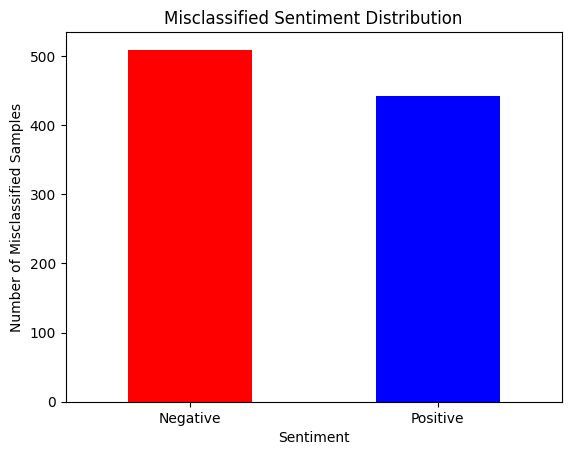

In [ ]:
# Visualize class distribution
# Import the 'pyplot' module from 'matplotlib' and alias it as 'plt'
import matplotlib.pyplot as plt

class_distribution.plot(kind="bar", color=["red", "blue"], title="Misclassified Sentiment Distribution")
# Rotate x-axis labels to horizontal
plt.xticks(rotation=0)
plt.xlabel("Sentiment")
plt.ylabel("Number of Misclassified Samples")
plt.show()


In [ ]:
# Analyze review lengths
length_analysis = misclassified_df.groupby("True Label")["Review Length"].mean()
print("\nAverage Review Length by Sentiment (Misclassified Samples):")
print(length_analysis)


Average Review Length by Sentiment (Misclassified Samples):
True Label
Negative    250.070727
Positive    283.760181
Name: Review Length, dtype: float64


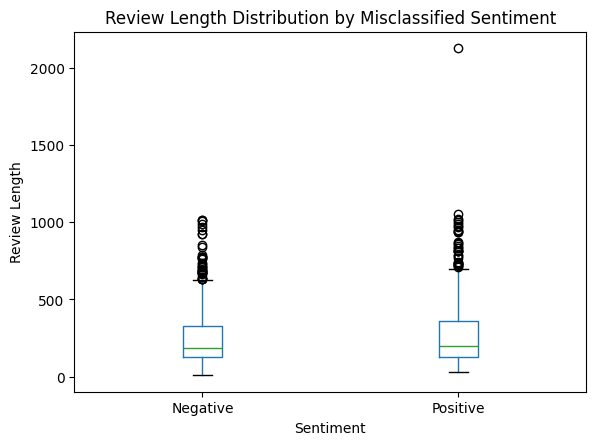

In [ ]:
# Visualize review length distribution
misclassified_df.boxplot(column="Review Length", by="True Label", grid=False)
plt.title("Review Length Distribution by Misclassified Sentiment")
plt.suptitle("")
plt.xlabel("Sentiment")
plt.ylabel("Review Length")
plt.show()

ROC(Receiver Operating Characteristic Curve)curve:

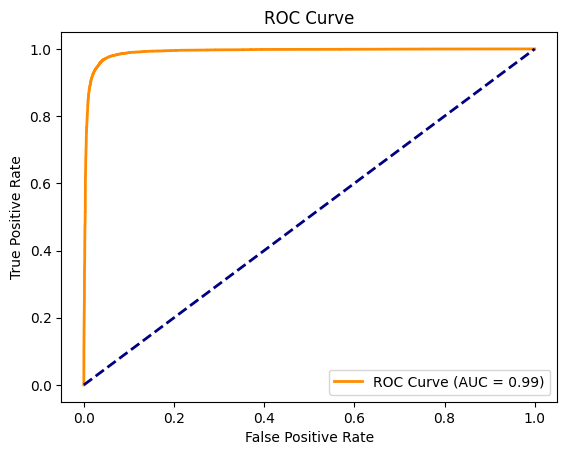

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(test_labels, ensembled_probs[:, 1])  # Positive class probabilities
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--", lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


Analysis: Model is very good at classifying postive and negative sample at any threshhold as the AUC(Area Under Curve)=.99 which is close to perfect 1.0

Precision-Recall curve is for when dataset is imbalanced, even though by data is balanced I included it,

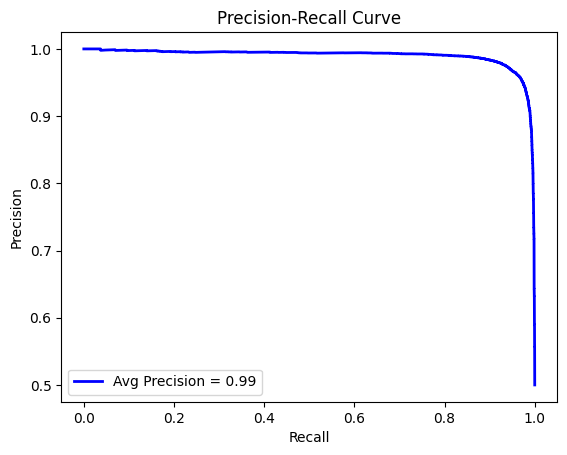

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(test_labels, ensembled_probs[:, 1])
avg_precision = average_precision_score(test_labels, ensembled_probs[:, 1])

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color="blue", lw=2, label=f"Avg Precision = {avg_precision:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()


Analysis:The AP (Average Precision), calculated as the area under the Precision-Recall curve, is 0.99, which is close to the perfect score of 1.0. This indicates that the model is excellent at balancing precision and recall across different thresholds, maintaining high performance in identifying positive samples

Confusion Matrix:

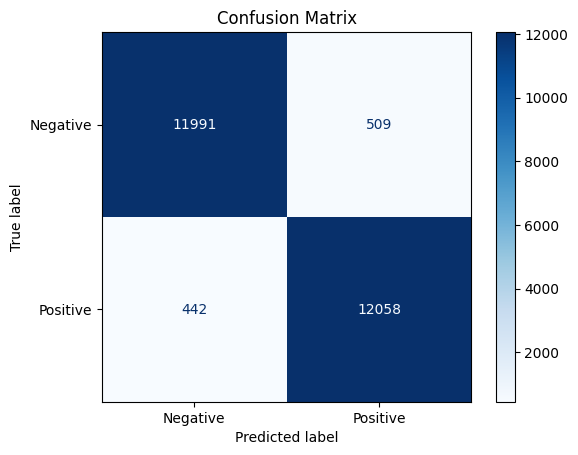

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(test_labels, ensembled_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])  # Adjust labels

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


total missclassified samples are (False Positive)509+(false Negative)442=951

Most common words,

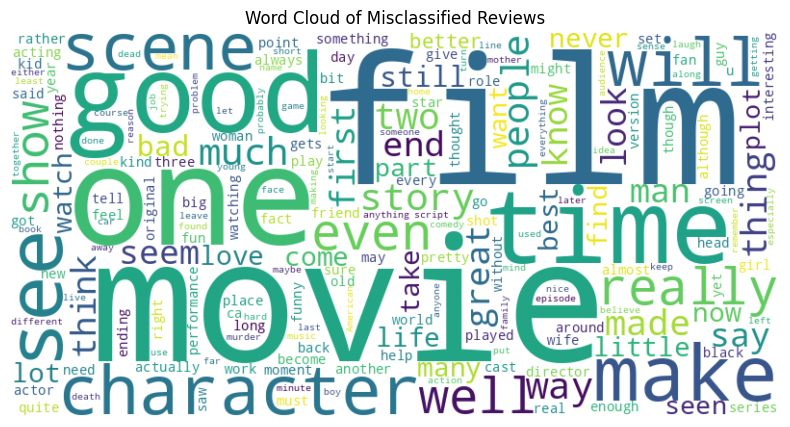

In [ ]:
from wordcloud import WordCloud

# Identify misclassified samples
misclassified_indices = np.where(ensembled_predictions != test_labels)[0]

# Extract misclassified reviews (assuming `review_df` contains cleaned reviews)
misclassified_texts = test_data.iloc[misclassified_indices]["cleaned_review"].tolist()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(misclassified_texts))

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Misclassified Reviews")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-33-e70c7695c8d6>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_filtered_terms, x="Frequency", y="Word", palette="viridis")


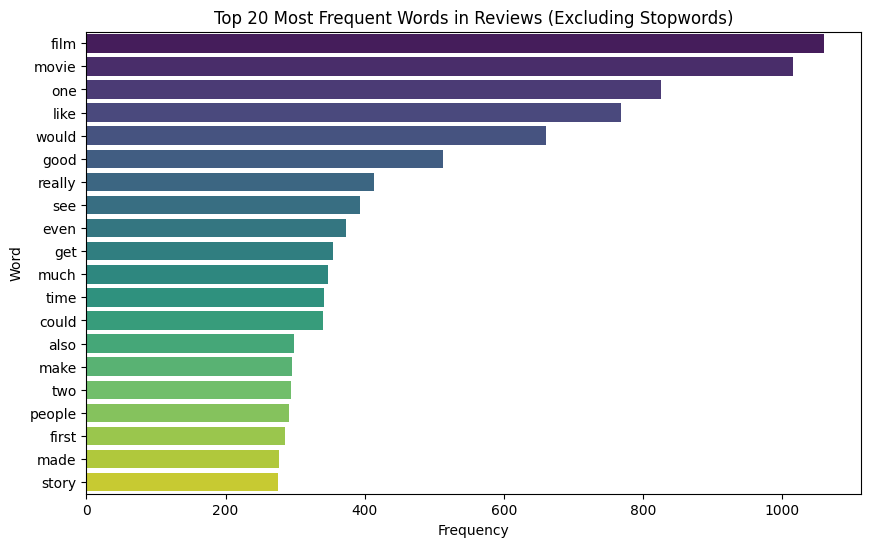

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


all_reviews = " ".join(misclassified_df["Review"].tolist())  # Join reviews into a single string

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words("english"))

# Remove stopwords from the tokenized words
meaningful_words = [word for word in words if word.lower() not in stop_words]

# Recalculate word frequencies
filtered_frequencies = Counter(meaningful_words)

# Convert to a DataFrame for visualization
filtered_df = pd.DataFrame(filtered_frequencies.items(), columns=["Word", "Frequency"]).sort_values(by="Frequency", ascending=False)

# Plot the top 20 most frequent meaningful words
top_filtered_terms = filtered_df.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_filtered_terms, x="Frequency", y="Word", palette="viridis")
plt.title("Top 20 Most Frequent Words in Reviews (Excluding Stopwords)")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()





frequency of words based on false predictions,

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-39-3eb85db2fd19>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=positive_df.head(20), x="Frequency", y="Word", palette="Blues_d")


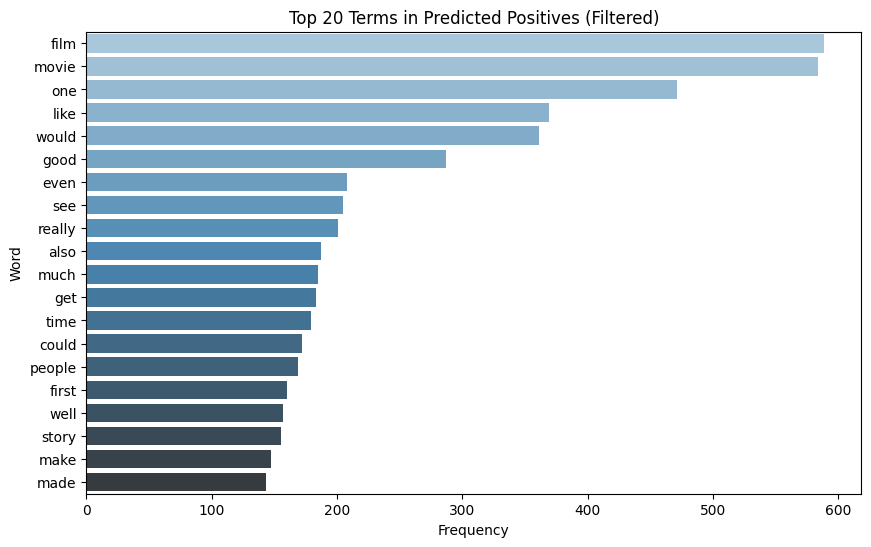

<ipython-input-39-3eb85db2fd19>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=negative_df.head(20), x="Frequency", y="Word", palette="Reds_d")


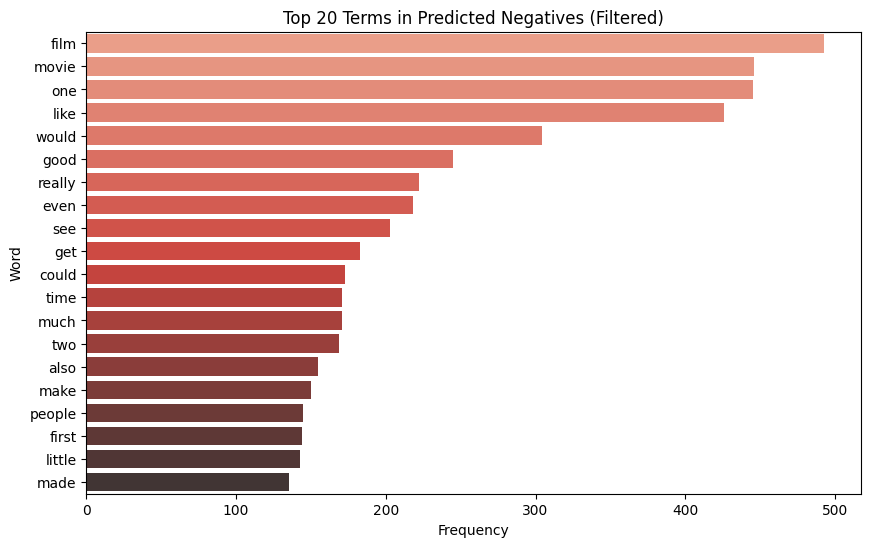

In [ ]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess text (remove stopwords, convert to lowercase, and tokenize)
def preprocess_text(text):
    words = text.lower().split()  # Convert to lowercase and split into words
    filtered_words = [word for word in words if word not in stop_words]  # Remove stopwords
    return filtered_words

# Preprocess predicted positives
predicted_positives = misclassified_df[misclassified_df["Predicted Label"] == "Positive"]["Review"]
positive_words = []
for review in predicted_positives:
    positive_words.extend(preprocess_text(review))

# Preprocess predicted negatives
predicted_negatives = misclassified_df[misclassified_df["Predicted Label"] == "Negative"]["Review"]
negative_words = []
for review in predicted_negatives:
    negative_words.extend(preprocess_text(review))

# Count word frequencies
positive_frequencies = Counter(positive_words)
negative_frequencies = Counter(negative_words)

# Convert to DataFrames
positive_df = pd.DataFrame(positive_frequencies.items(), columns=["Word", "Frequency"]).sort_values(by="Frequency", ascending=False)
negative_df = pd.DataFrame(negative_frequencies.items(), columns=["Word", "Frequency"]).sort_values(by="Frequency", ascending=False)

# Visualize top terms for predicted positives
plt.figure(figsize=(10, 6))
sns.barplot(data=positive_df.head(20), x="Frequency", y="Word", palette="Blues_d")
plt.title("Top 20 Terms in Predicted Positives (Filtered)")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

# Visualize top terms for predicted negatives
plt.figure(figsize=(10, 6))
sns.barplot(data=negative_df.head(20), x="Frequency", y="Word", palette="Reds_d")
plt.title("Top 20 Terms in Predicted Negatives (Filtered)")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()


Analysis:The model appears to struggle with predicting negative sentiment, likely due to sentiment-inducing words such as 'good' being present in both negative and positive reviews. This overlap may confuse the model, especially if negative sentiment words are less frequent in the dataset. Further analysis is necessary to evaluate the model's contextual understanding and to determine whether it overemphasizes certain words, leading to potential biases in its predictions.

In [ ]:
import pandas as pd

# Create a DataFrame with 3 sample reviews
reviews_df = pd.DataFrame({
    "review": [
        "This movie was absolutely fantastic, I loved every moment of it!",
        "The plot was terrible and the acting was even worse.",
        "The movie was the best!!"
    ]
})
print(reviews_df)


                                              review
0  This movie was absolutely fantastic, I loved e...
1  The plot was terrible and the acting was even ...
2                           The movie was the best!!


In [ ]:
reviews_df['cleaned_review']=reviews_df['review'].apply(clean_text)
print(reviews_df["cleaned_review"])

0    This movie was absolutely fantastic, I loved e...
1    The plot was terrible and the acting was even ...
2                             The movie was the best!!
Name: cleaned_review, dtype: object


using previously saved logits so that model does not need to bereloaded everytime

In [ ]:
import numpy as np
import torch.nn.functional as F
import torch

# Load saved logits
roberta_logits = np.load("/content/roberta_review_logits.npy")
modernbert_logits = np.load("/content/modernBert_review_logits.npy")
debarta_logits = np.load("/content/Debarta_review_logits.npy")

# Define weights
debarta_weight = 5
modernbert_weight = 3
roberta_weight = 2

# Compute weighted logits
weighted_logits = (
    debarta_weight * debarta_logits +
    modernbert_weight * modernbert_logits +
    roberta_weight * roberta_logits
) / (debarta_weight + modernbert_weight + roberta_weight)

# Convert weighted logits to probabilities using softmax
probabilities = F.softmax(torch.tensor(weighted_logits), dim=-1).numpy()

# Get predicted class indices (0 or 1)
ensemble_predictions = np.argmax(probabilities, axis=-1) #This line is added to define ensemble_predictions

label_mapping = {0: "Negative", 1: "Positive"}
predicted_labels = [label_mapping[pred] for pred in ensemble_predictions]

# Create a DataFrame with reviews and their predictions
results_df = pd.DataFrame({
    "Review": reviews_df['cleaned_review'],
    "Predicted Sentiment": predicted_labels
})

# Display the DataFrame
print(results_df.head())

                                              Review Predicted Sentiment
0  This movie was absolutely fantastic, I loved e...            Positive
1  The plot was terrible and the acting was even ...            Negative
2                           The movie was the best!!            Positive
